In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_mae(y, y_pred):
    return np.sum(np.abs(y-y_pred))/len(y)

In [3]:
def calc_mse(y, y_pred):
    return np.sum((y-y_pred)**2)/len(y)

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],       # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T   # стаж репетитора
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]        # средний балл ЕГЭ (целевая переменная)

In [5]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred_train = X@w

In [6]:
w, calc_mse(y, y_pred_train)

(array([47.23214286,  3.91071429]), 45.93749999999999)

### <b> Gradient Descent

In [7]:
def grad(X, w, y):
    n = len(y)
    return 2/n * X.T@(X@w - y)

In [8]:
def grad_descent(iterations, eta, X, y):    
    w = np.array([0.5, 0.5])
    errs = np.zeros(iterations)
    
    for i in range(iterations):
        y_pred = X@w
        errs[i] = calc_mse(y, y_pred)
        w -= eta*grad(X, w, y)
    return w, errs

In [51]:
def grad_descent_with_diff(eta, iteration, X, y, diff):    
    w = np.array([0.5, 0.5])
    errs = []
    
    #calculation first mse
    mse_old = calc_mse(y, X@w)
    errs.append(mse_old)
    
    #calculation second mse
    w -= eta*grad(X, w, y)
    mse_new = calc_mse(y, X@w)
    errs.append(mse_new)
    
    while abs(mse_new - mse_old) > diff and iteration > 0:
        
        w -= eta*grad(X, w, y)
        y_pred = X@w
        
        mse_old = mse_new
        mse_new = calc_mse(y, y_pred)
        errs.append(mse_new)      
        iteration -= 1
    return w, errs

In [52]:
def grad_descent_var_lr(eta_start, iteration, X, y, diff):
    w_old = np.array([0.5, 0.5])
    errs = []
    
    #calc first mse
    mse_old = calc_mse(y, X@w_old)
    errs.append(mse_old)
    
    #calc second mse
    w_new = w_old - eta_start*grad(X, w_old, y)
    mse_new = calc_mse(y, X@w_new)
    errs.append(mse_new)
    
    iteration -= 1
    
    #gradient descent
    while abs(mse_new - mse_old) > diff and iteration > 0:
        delta = 1
        grad_sq_norm = np.linalg.norm(grad(X, w_old, y), ord=2)
        while mse_new > mse_old - delta*eta_start*grad_sq_norm:
            delta /= 2
        eta = delta*eta_start
        
        w_old = w_new
        w_new -= eta*grad(X, w_new, y)
        
        mse_old = mse_new
        mse_new = calc_mse(y, X@w_new)
        errs.append(mse_new)
        
        iteration -= 1
    
    return w_new, errs  

### <b> Task №1,2

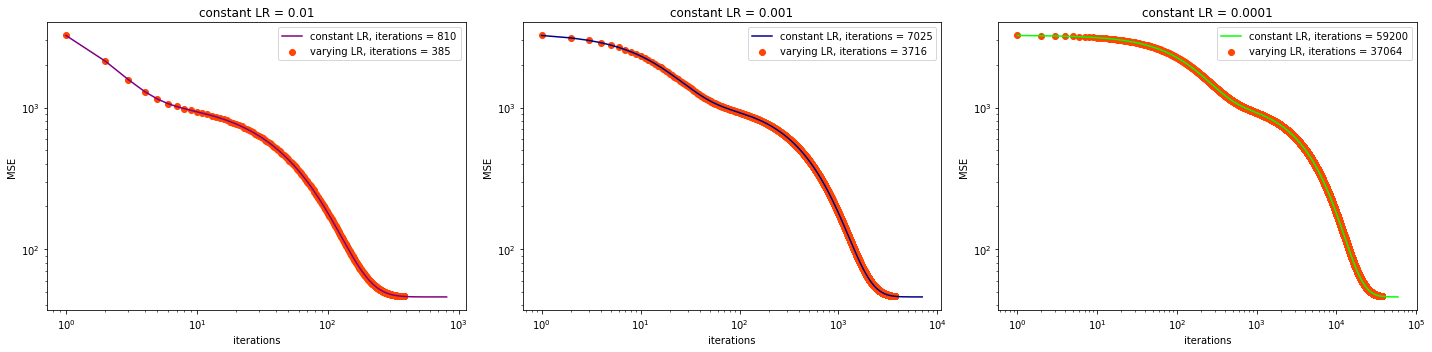

In [54]:
etas = [1e-2, 1e-3, 1e-4]
diff = 1e-6
iterations = 1000
colors = ['#800080', '#00008B', '#00FF00', '#FF00FF']

n = len(etas)

fig, ax = plt.subplots(1, n, figsize = (20,5))
ax = ax.ravel()

for i in range(n):
    ax[i].set_xlabel('iterations')
    ax[i].set_ylabel('MSE')
    ax[i].set_title(f'constant LR = {etas[i]}')
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')
    w_stat, errs_stat = grad_descent_with_diff(etas[i], iterations*10**i, X, y, diff)
    w_var, errs_var = grad_descent_var_lr(etas[i], iterations*10**i, X, y, diff)
    ax[i].plot(np.arange(1, len(errs_stat)+1), errs_stat, color = colors[i], label = f'constant LR, iterations = {len(errs_stat) - 1}')
    ax[i].scatter(np.arange(1, len(errs_var)+1), errs_var, color = '#FF4500', label = f'varying LR, iterations = {len(errs_var) - 1}')
    ax[i].legend()
plt.tight_layout()

### <b> Результаты исследования

__1__. При $\eta = 10^{-1}$ алгоритм не сходился.

__2__. При $\eta = 10^{-2}$ алгоритм проявил себя лучше, чем при других значениях этого параметра: сойтись (по MSE) к ответу, который давал МНК, получилось за $810$ итераций.

__3__. Ускорить сходимость алгоритма можно за счёт вариации $LR$. Лучший результат у алгоритма с постоянным шагом был достигнут при $\eta = 10^{-2}$, <i><b>diff</b></i> = $10^{-6}$; при этом количество итераций было равно $810$. Алгоритм с переменным шагом при тех же значениях сошелся быстрее, чем в 2 раза — за $385$ итераций.

__4__. Зависимость между параметрами $\eta$ и $\text{iterations}$: рост порядка $\eta$ на 1 способствует увеличению порядка $\text{iterations}$ на 1, т.е порядки растут линейно, сами же величины связаны обратно пропорционально $$\eta \approx \frac{1}{\text{iteration}}$$

### <b> Task №3

In [56]:
eta, diff = 1e-2, 1e-6
w, errs = grad_descent_with_diff(eta, iterations, X, y, diff)
iterations = len(errs)-1
print(f'MSE перестало изменяться в {str(diff)[-1]}-м знаке после запятой, когда было выполнено {iterations} итераций')

MSE перестало изменяться в 6-м знаке после запятой, когда было выполнено 810 итераций
